In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.vgg19_bn(pretrained=True)
time1 = time.time()
print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [2]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(25088,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.6),
                                 nn.Linear(4096,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.6),
                                 nn.Linear(4096,6))
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

transfer_vgg19_bn_ADAM
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.5482, Accuracy: 57.5792%,Valid: Loss: 0.5043, Accuracy: 82.3171%,Time: 12.0332s
Epoch: 2
Epoch: 002, Training: Loss: 0.3262, Accuracy: 89.4231%,Valid: Loss: 0.6245, Accuracy: 83.2317%,Time: 11.8504s
Epoch: 3
Epoch: 003, Training: Loss: 0.0758, Accuracy: 97.4548%,Valid: Loss: 0.7288, Accuracy: 84.1463%,Time: 12.3960s
Epoch: 4
Epoch: 004, Training: Loss: 0.0460, Accuracy: 98.5294%,Valid: Loss: 0.6868, Accuracy: 85.9756%,Time: 12.4713s
Epoch: 5
Epoch: 005, Training: Loss: 0.0249, Accuracy: 99.3213%,Valid: Loss: 0.9043, Accuracy: 83.2317%,Time: 12.1335s
Epoch: 6
Epoch: 006, Training: Loss: 0.0503, Accuracy: 98.6425%,Valid: Loss: 0.6760, Accuracy: 86.5854%,Time: 11.9460s
Epoch: 7
Epoch: 007, Training: Loss: 0.0467, Accuracy: 98.8122%,Valid: Loss: 1.2224, Accuracy: 80.4878%,Time: 11.9040s
Epoch: 8
Epoch: 008, Training: Loss: 0.0217, Accuracy: 99.3778%,Valid: Loss: 0.8749, Accuracy: 85.9756%,Time: 12.2055s
Epoch: 9
Epoch: 

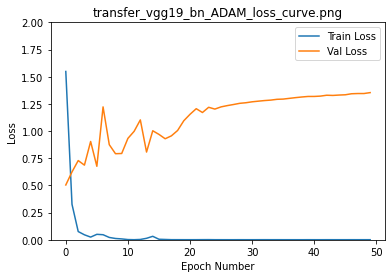

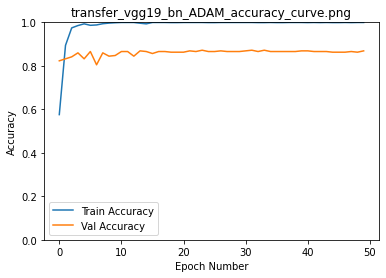

RuntimeError: CUDA error: out of memory

In [3]:
device = 8
model_name_list = ["transfer_vgg19_bn"]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+"ADAM"
print(file_name)
optimizer = optim.Adam(model.parameters(),lr=0.001)
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=50,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)